In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
spine_data = pd.read_csv('datasets/Dataset_spine.csv')

In [7]:
spine_data.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
191,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,0.273687,10.1834,10.4160,16.38788,-11.786587,10.0888,Abnormal
256,54.752520,9.752520,48.000000,45.000000,123.037999,8.235294,0.385732,28.1386,14.9326,13.57371,-18.445718,13.8497,Normal
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,0.506379,23.0527,15.2430,14.14875,-19.895641,8.6239,Abnormal
196,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,0.276928,24.5529,10.4232,14.97470,-22.286220,21.7822,Abnormal
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,0.386903,17.0217,8.8097,16.82108,-30.591567,35.4529,Abnormal


In [8]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [9]:
spine_data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,49.706610,13.040974,31.334500,36.665635,108.648265,-7.825986,0.688010,31.3502,16.5097,15.17645,-0.502127,18.3437,Abnormal
1,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,0.417721,29.8852,12.3509,11.99547,-34.927709,19.3766,Normal
2,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,0.319205,30.6389,18.6181,15.55901,2.537043,9.4310,Abnormal
3,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,0.932922,32.1169,14.3037,10.64326,-31.198847,11.2307,Normal
4,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
5,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180,Abnormal
6,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
7,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
8,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,0.686409,8.3909,10.8700,7.27404,-26.195988,21.8465,Normal
9,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,0.212129,14.4911,7.5117,12.11463,-19.934103,41.7304,Normal


In [10]:
spine_data[spine_data.isnull().any(axis=1)].count()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [12]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [13]:
from sklearn import preprocessing

In [14]:
label_encoding = preprocessing.LabelEncoder()

spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [15]:
spine_data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,49.706610,13.040974,31.334500,36.665635,108.648265,-7.825986,0.688010,31.3502,16.5097,15.17645,-0.502127,18.3437,0
1,51.325464,13.631223,33.258578,37.694240,131.306122,1.788870,0.417721,29.8852,12.3509,11.99547,-34.927709,19.3766,1
2,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,0.319205,30.6389,18.6181,15.55901,2.537043,9.4310,0
3,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,0.932922,32.1169,14.3037,10.64326,-31.198847,11.2307,1
4,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,1
5,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0.832811,23.1811,11.2491,11.69024,-25.011107,21.9180,0
6,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,0
7,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,0
8,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,0.686409,8.3909,10.8700,7.27404,-26.195988,21.8465,1
9,61.540599,19.676957,52.892229,41.863642,118.686268,4.815031,0.212129,14.4911,7.5117,12.11463,-19.934103,41.7304,1


In [16]:
spine_data_corr = spine_data.corr()

spine_data_corr

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


<Axes: >

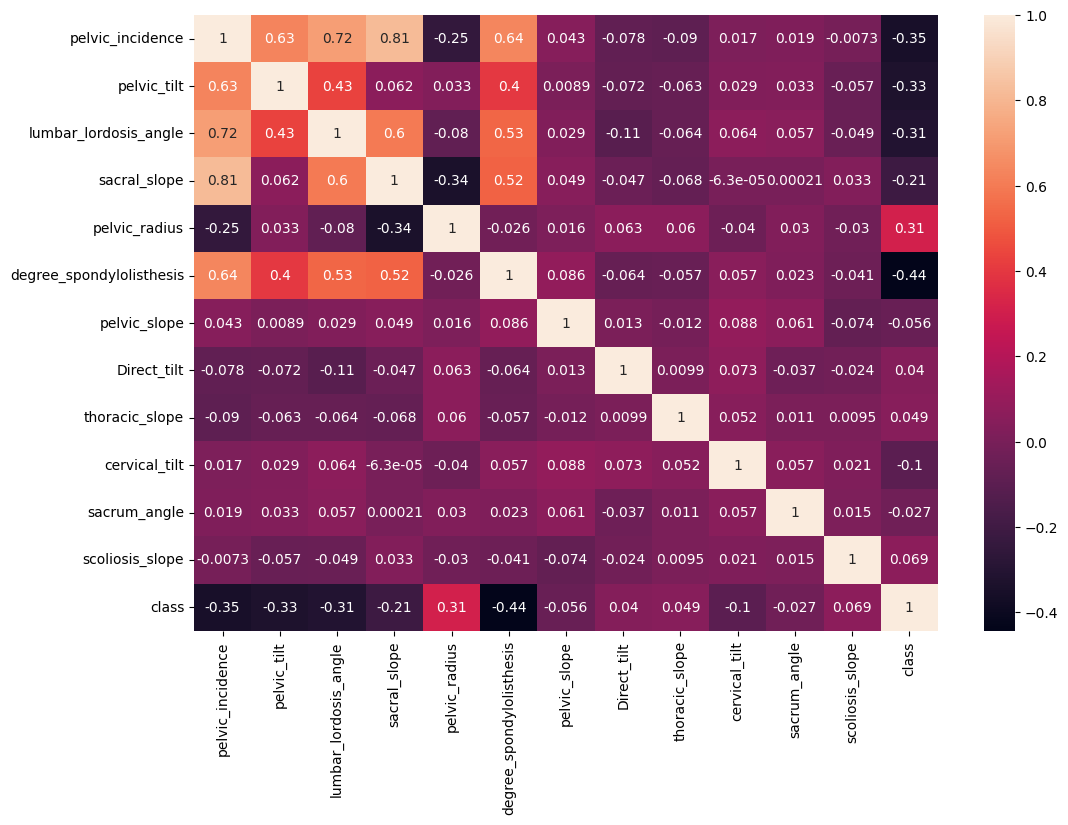

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(spine_data_corr, annot=True)

In [18]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('class', axis=1)
Y = spine_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [19]:
from sklearn.neural_network import MLPClassifier

In [40]:
mlp_clf = MLPClassifier(activation='logistic',
                        hidden_layer_sizes=(100,100),
                        solver='lbfgs',
                        alpha=0.001,
                        verbose=True,
                        max_iter=1000)   

In [41]:
mlp_clf.fit(x_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        11501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43704D-01    |proj g|=  8.86455D-02

At iterate    1    f=  6.27186D-01    |proj g|=  2.82626D-02

At iterate    2    f=  6.24618D-01    |proj g|=  2.56074D-02

At iterate    3    f=  6.21178D-01    |proj g|=  3.23667D-02

At iterate    4    f=  6.15813D-01    |proj g|=  3.98856D-02

At iterate    5    f=  6.09863D-01    |proj g|=  3.15383D-02

At iterate    6    f=  5.97652D-01    |proj g|=  1.28342D-01

At iterate    7    f=  5.81080D-01    |proj g|=  5.68654D-02

At iterate    8    f=  5.59709D-01    |proj g|=  1.00717D-01

At iterate    9    f=  5.29449D-01    |proj g|=  1.39627D-01

At iterate   10    f=  4.86198D-01    |proj g|=  1.04827D-01

At iterate   11    f=  4.22287D-01    |proj g|=  7.66072D-02

At iterate   12    f=  4.16287D-01    |proj g|=  1.58984D-01

At iterate   13    f=  4.1

 This problem is unconstrained.



At iterate   20    f=  3.70852D-01    |proj g|=  3.03995D-01

At iterate   21    f=  3.61155D-01    |proj g|=  3.95782D-01

At iterate   22    f=  3.53885D-01    |proj g|=  1.79609D-01

At iterate   23    f=  3.47870D-01    |proj g|=  8.34368D-02

At iterate   24    f=  3.33663D-01    |proj g|=  1.33916D-01

At iterate   25    f=  3.33151D-01    |proj g|=  1.34356D-01

At iterate   26    f=  3.30206D-01    |proj g|=  2.28131D-01

At iterate   27    f=  3.27134D-01    |proj g|=  6.95153D-02

At iterate   28    f=  3.23728D-01    |proj g|=  1.99601D-01

At iterate   29    f=  3.22755D-01    |proj g|=  1.43382D-01

At iterate   30    f=  3.19899D-01    |proj g|=  4.66637D-02

At iterate   31    f=  3.11718D-01    |proj g|=  1.90509D-01

At iterate   32    f=  3.08249D-01    |proj g|=  1.24744D-01

At iterate   33    f=  3.05312D-01    |proj g|=  1.23602D-01

At iterate   34    f=  3.03247D-01    |proj g|=  7.20700D-02

At iterate   35    f=  3.01675D-01    |proj g|=  1.58684D-01

At iter

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 100),
              max_iter=1000, solver='lbfgs', verbose=True)

In [42]:
y_pred = mlp_clf.predict(x_test)

In [43]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(10)

,y_test,y_pred
38,0,0
65,1,1
174,0,1
137,1,1
260,1,1
98,0,0
119,1,1
166,0,0
6,0,1
68,0,0


In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8064516129032258

In [45]:
spine_data_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)

spine_data_crosstab

y_pred,0,1
y_test,,
0,35,6
1,6,15


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[35  6]
 [ 6 15]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.71      0.71      0.71        21

    accuracy                           0.81        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.81      0.81      0.81        62

